In [0]:
from google.colab import files;
files.upload()

In [0]:
import pandas as pd
data=pd.read_csv("clusterincluster.txt",sep=" ",header=None)
X=data.iloc[ :, :-1].values
Y=data.iloc[:,2].values
#Y=Y-1

In [0]:

import numpy as np

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)



In [0]:

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [0]:
def sigmoid(z):
  d=1/(1+np.exp(-z))
  return d
 

In [0]:
m_train=X_train.shape[0];
m_test=X_test.shape[0];
feat=X_train.shape[1];

In [0]:
def initialise(dim):
  W=np.zeros(shape=(dim,1))
  b=0.00
  return W,b

In [0]:
def propagate(W,b,X,Y):
  m=X.shape[1]
  A=sigmoid(np.dot(W.T,X)+b);
  cost=-1/m*(np.sum((Y*np.log(A)+(1-Y)*np.log(1-A))));
  dW=1/m*np.dot(X,(A-Y).T);
  db=1/m*np.sum(A-Y);
  grads = {"dW": dW,
             "db": db};
  return grads,cost;
    


In [0]:
def optimise(W,b,X,Y,num_iteration,alpha):
  costs=[]
  for i in range(num_iteration):
    grads,cost=propagate(W,b,X,Y)
    dW=grads['dW'];
    db=grads['db'];
    W=W-alpha*dW;
    b=b-alpha*db;
    costs.append(cost);
   
  parameters={"W": W,
                "b":b
               }
  gradients={"dW":dW,
               "db":db}
   
  return parameters,gradients


In [0]:
def prediction(W,b,X):
  m=X.shape[1];
  A=np.dot(W.T,X)+b;
  A=sigmoid(A)
  Y_p=np.zeros(shape=(1,m))
  for i in range(A.shape[1]):
    if(A[0,i]>=0.5):
      Y_p[0,i]=1;
      
      
  return Y_p;      
    

In [0]:
def model(X_train,Y_train,X_test,Y_test,num_iteration,alpha):
  W,b=initialise(X_train.shape[0])
  parameters, grads = optimise(W, b, X_train, Y_train, num_iteration,alpha)
  W=parameters['W'];
  b=parameters['b'];
  Y_prediction_test = prediction(W, b, X_test)
  Y_prediction_train = prediction(W,b,X_train)
  print(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100);
  print((100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100));
  d = {  "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": num_iteration};
  return d;
  
  

In [19]:
d = model(X_train.T, Y_train.T, X_test.T ,Y_test.T, num_iteration = 10000, alpha=0.99)

49.82482482482482
44.49999999999999


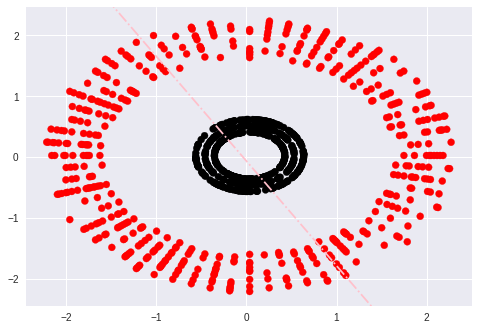

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
colors=["black","red"];
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test,cmap=mpl.colors.ListedColormap(colors))
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * d["W"][0] + d["b"])/d["W"][1]
plt.plot(x_vals, y_vals, '-.', c="pink")
